# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [28]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [30]:
print(df['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


#Cleaning

In [31]:
import sys
sys.path.insert(0, '../DataPreprocessing')
from data_cleaning import *

df = df.drop(['Emp_Id'], axis=1)

#One hot encode Department and salary
df = one_hot_encode(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  bool   
 9   Department_RandD        14999 non-null  bool   
 10  Department_accounting   14999 non-null  bool   
 11  Department_hr           14999 non-null  bool   
 12  Department_management   14999 non-null  bool   
 13  Department_marketing    14999 non-null  bool   
 14  Department_product_mng  14999 non-null

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
y = df['time_spend_company']  # Target variable for regression
X = df.drop(columns=['time_spend_company', 'left'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gbm_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
logistic_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, (y_train > np.median(y_train)).astype(int))  # Assuming binary classification

# Extract feature importances or coefficients
features = X_train.columns
rf_results = pd.DataFrame({'Feature': features, 'Importance_RF': rf_regressor.feature_importances_}).sort_values(by='Importance_RF', ascending=False)
gbm_results = pd.DataFrame({'Feature': features, 'Importance_GBM': gbm_regressor.feature_importances_}).sort_values(by='Importance_GBM', ascending=False)
linear_results = pd.DataFrame({'Feature': features, 'Coefficient_Linear': linear_reg.coef_}).sort_values(by='Coefficient_Linear', ascending=False, key=lambda col: abs(col))
logistic_results = pd.DataFrame({'Feature': features, 'Coefficient_Logistic': logistic_reg.coef_[0]}).sort_values(by='Coefficient_Logistic', ascending=False)

# Print the sorted results
print("Random Forest Feature Importances (Higher = More Important for Longer Tenure):")
print(rf_results)
print("\nGradient Boosting Feature Importances (Higher = More Important for Longer Tenure):")
print(gbm_results)
print("\nLinear Regression Coefficients (Higher Absolute Value = More Important, Positive = Longer Tenure):")
print(linear_results)
print("\nLogistic Regression Coefficients (Higher = More Likely Above Median Tenure):")
print(logistic_results)


Random Forest Feature Importances (Higher = More Important for Longer Tenure):
                   Feature  Importance_RF
0       satisfaction_level       0.254485
3     average_montly_hours       0.250691
1          last_evaluation       0.188767
2           number_project       0.078392
4            Work_accident       0.029060
10   Department_management       0.024125
16             salary_high       0.020279
13        Department_sales       0.019770
18           salary_medium       0.018172
17              salary_low       0.017209
5    promotion_last_5years       0.014266
14      Department_support       0.013829
11    Department_marketing       0.013197
6            Department_IT       0.012828
15    Department_technical       0.011989
8    Department_accounting       0.010165
12  Department_product_mng       0.009657
7         Department_RandD       0.007063
9            Department_hr       0.006055

Gradient Boosting Feature Importances (Higher = More Important for Longer Tenure

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# df is cleaned dataset
left_df = df[df['left'] == 1]  # Filter for employees who have left

# Split the dataset into features (X) and target variable (y)
X = left_df.drop(columns=['time_spend_company'])
y = left_df['time_spend_company']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Neural Network Regression': MLPRegressor(max_iter=2000,random_state=42),
    'Support Vector Regression': SVR()
}

# Dictionary to hold predictions
predictions = {}
rmse_values = {}

# Train and predict with each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_values[name] = rmse
    print(f"{name} - Root Mean Squared Error: {rmse}")
    predictions[name] = model.predict(scaler.transform(X))  # Predict on the entire dataset

# Add estimated times back to the DataFrame
for name, pred in predictions.items():
    left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred

# Print the first five rows of the updated DataFrame
# print(left_df.tail(5))

Linear Regression - Root Mean Squared Error: 0.49810068923964246
Random Forest Regression - Root Mean Squared Error: 0.33572966147542815
Gradient Boosting Regression - Root Mean Squared Error: 0.4150487049015014
Neural Network Regression - Root Mean Squared Error: 0.4231464392120119
Support Vector Regression - Root Mean Squared Error: 0.47854425510485604


C:\Users\Allyssa\AppData\Local\Temp\ipykernel_28400\2191950162.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred
C:\Users\Allyssa\AppData\Local\Temp\ipykernel_28400\2191950162.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred
C:\Users\Allyssa\AppData\Local\Temp\ipykernel_28400\2191950162.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

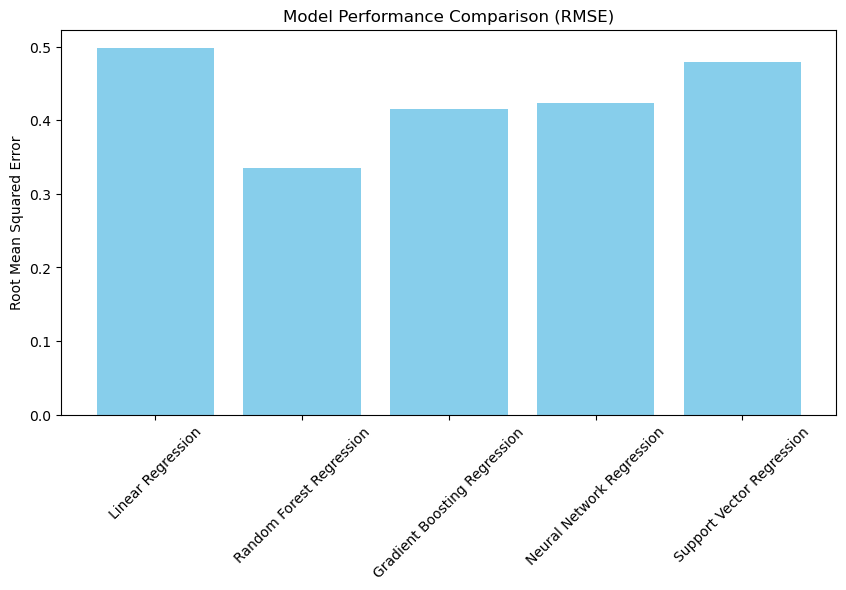

In [36]:
# Visualization
plt.figure(figsize=[10,5])  # Set the figure size for better readability
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')  # Create a bar chart
plt.title('Model Performance Comparison (RMSE)')  # Title of the plot
plt.ylabel('Root Mean Squared Error')  # Y-axis label
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()  # Show the plot